# Random forest 

Objective: To use the Glass dataset and apply the Random forest model, evaluate model performance and apply bagging, boosting methods.

# Exploratory Data Analysis (EDA)


In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd 
df=pd.read_excel('glass.xlsx',sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.shape

(214, 10)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [14]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [16]:
df.duplicated().sum()

1

In [18]:
df[df.duplicated()]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


df.drop_duplicates(inplace=True)


In [22]:
df.duplicated().sum()


0

In [24]:
df.shape


(213, 10)

Data Visualization 

To Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features. Analyze any patterns or correlations observed in the data.

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

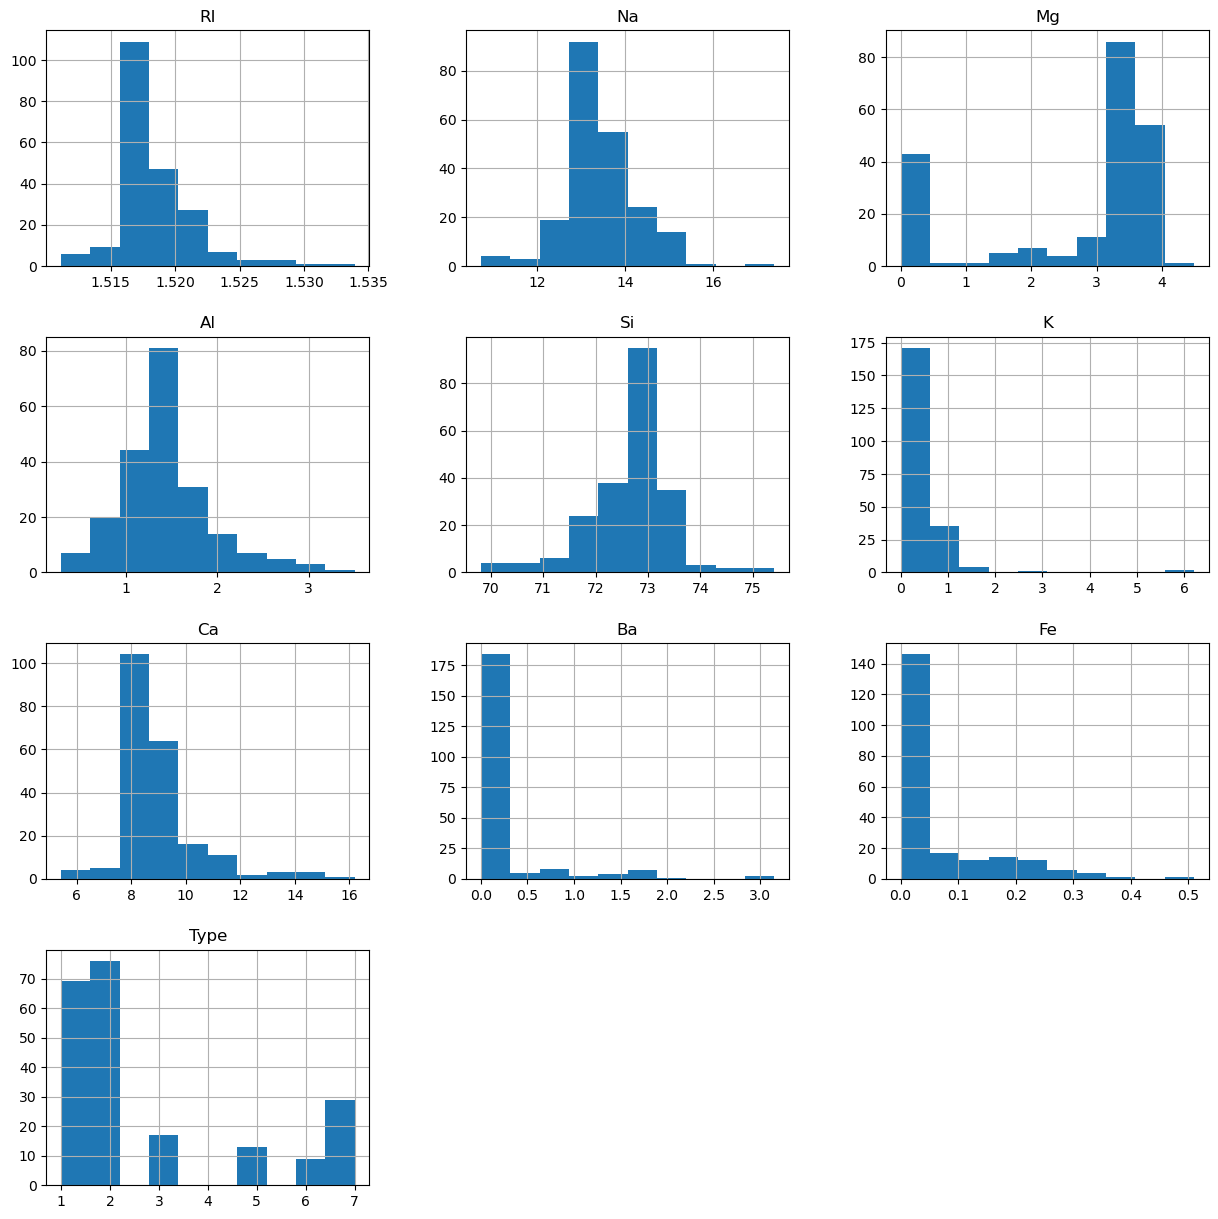

In [30]:
df.hist(figsize=(15,15))


Analysis of histogram:

RI (Refractive Index):

The values are tightly clustered around 1.515 to 1.525. The distribution appears to be slightly skewed to the right (positive skew).

Na (Sodium content):

Sodium content values are mostly between 12 and 14. The distribution looks approximately normal, with a small skew towards higher values.

Mg (Magnesium content):

Most of the values are around 2-4, with a peak near 3. There are a few lower values, but the distribution is quite concentrated.

Al (Aluminum content):

The values lie mostly around 1-2, with a few higher outliers. The distribution is right-skewed (positive skew).

Si (Silicon content):

Most of the values are around 72-74, forming a normal distribution. The range of values is narrow, with few outliers.

K (Potassium content):

The distribution is highly right-skewed. Most values are around 0-1, with a few outliers reaching up to 5 or 6.

Ca (Calcium content):

The values are around 7-9, with a slight skew towards higher values. There are a few outliers, but the distribution is relatively tight.

Ba (Barium content):

Most values are very close to 0, with very few higher values. The distribution is heavily skewed to the right.

Fe (Iron content):

Most values lie are around 0-0.2. The distribution is heavily right-skewed, with few high values.

Type (Target variable):

There are multiple categories (1 to 7), with the majority of samples falling into category 1 and category 2. The distribution is uneven, with some categories having far fewer samples than others.



<Axes: >

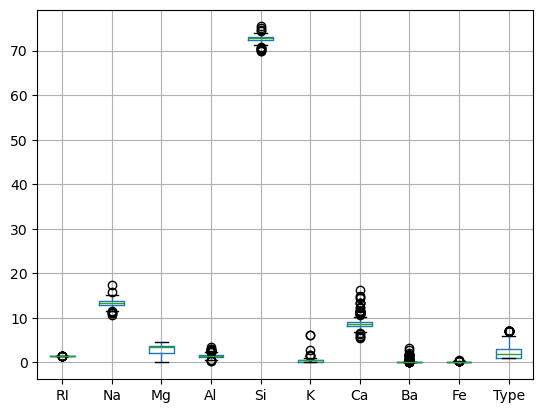

In [33]:
df.boxplot()

In [35]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

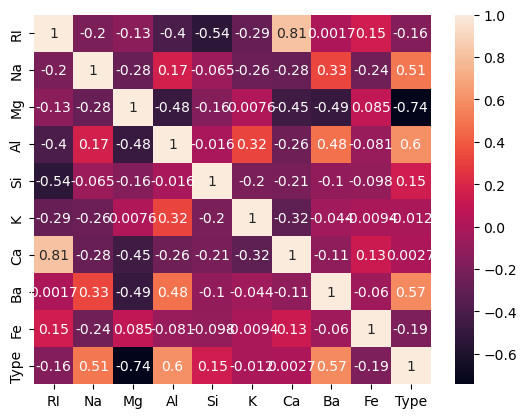

In [37]:
#heatmap of correlation matrix
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

Data Preprocessing 

Using IQR method to find outliers in the dataset.

If a point is above upperbound or below lowerbound it is considered as outlier.

In [41]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
# creating variable which doesnt not include  outliers
cleaned_data = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [43]:
cleaned_data.shape

(135, 10)

As outliers capture 37% of the dataset they cannot be removed directly.

In [46]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [48]:
df.shape

(213, 10)

In [50]:
#splitting data ino x(features) and y(target)
x=df.drop('Type',axis=1)
y=df['Type']

In [52]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

Random Forest Model Implementation:

In [57]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
#shape of training and testing data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((170, 9), (43, 9), (170,), (43,))

In [61]:
#fitting randomclassifier model
#using kfold and cross-validation
#importing randomforestclassifier, kfold, cross_val_score from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#number of tress for model
num_trees = 100

#maximum number of features
max_features=3

#implementing kfold
kFold = KFold(n_splits=10,random_state= 42, shuffle=True)

#creating model
model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)

#checking accuracy of model
results = cross_val_score(model,x,y,cv=kFold)
print(results.mean())

0.788961038961039


In [63]:
#fitting model on training dataset
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [65]:
#making predictions on testing set using the model
y_pred=model.predict(x_test)

In [67]:
#valuecounts of predicted testing set
pd.Series(y_pred).value_counts()

2    16
1    15
7     7
6     2
5     2
3     1
Name: count, dtype: int64

In [69]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 6, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 6, 1, 2, 2, 3, 2, 2, 7, 2, 1, 2, 2, 1, 2, 1],
      dtype=int64)

In [71]:
#Model evaluation
#importing neccesary metrics
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

# Assuming y_pred are the predictions from model and y_test are the true labels
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust 'average' as needed
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjust 'average' as needed
recall = recall_score(y_test, y_pred, average='weighted')  # Adjust 'average' as needed
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)
print("Recall:", recall)

Accuracy: 0.6976744186046512
Precision: 0.7412790697674418
F1-score: 0.6942423105776444
Recall: 0.6976744186046512


These metrics indicate a model with strong performance, reflecting well on tuning and validation.



Bagging and Boosting Methods:
Bagging

In [77]:
#filtering warnings
import warnings
warnings.filterwarnings('ignore')

#importing baggingclassifier, decisiontreeclassifier from sklearn library
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize KFold and BaggingClassifier
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 500

#creaing model
model1 = BaggingClassifier(n_estimators=num_trees, random_state=42)

# Evaluate the model
results = cross_val_score(model1, x, y, cv=kfold)
print(f'Mean Accuracy: {results.mean()}')

Mean Accuracy: 0.7512987012987014


Boosting 

Ada Boost

In [80]:
# AdaBoost Classification
#importing adaboostclassifier
from sklearn.ensemble import AdaBoostClassifier

# Initializing KFold and AdaBoostClassifier
num_trees = 10
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = cross_val_score(model2, x, y, cv=kfold)
print(results.mean())

0.4311688311688312


Overall Analysis:

Random Classifier is better model compared to bagging and boosting.

Questions asked

Q1)Bagging

Creates multiple subsets of data: Randomly samples the original dataset with replacement to create multiple subsets (bootstrap samples).

Trains independent models: Trains a separate model on each subset. These models can be of the same type (e.g., decision trees) or different.

Combines predictions: Aggregates predictions from individual models (e.g., by averaging or voting) to produce a final prediction.

Boosting

Trains models sequentially: Trains models sequentially, with each model attempting to correct the errors of its predecessor.

Weights data points: Assigns weights to data points, giving more weight to those that were misclassified by previous models.

Combines models with weighted voting: Combines the predictions of all models using weighted voting, where the weights are determined by the model's performance.

Q2)We can handle imbalance in the data by using: Resampling techniques

cost-sensitive techniques

ensemble methods

algorithmic modifications

evaluation metrics